In [135]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

sns.set()

In [265]:
df = pd.read_csv('Sales-nike.csv', index_col = 'DATE', parse_dates = True)
df.columns = ['sales']
result = pd.DataFrame()

In [266]:
df.head()

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


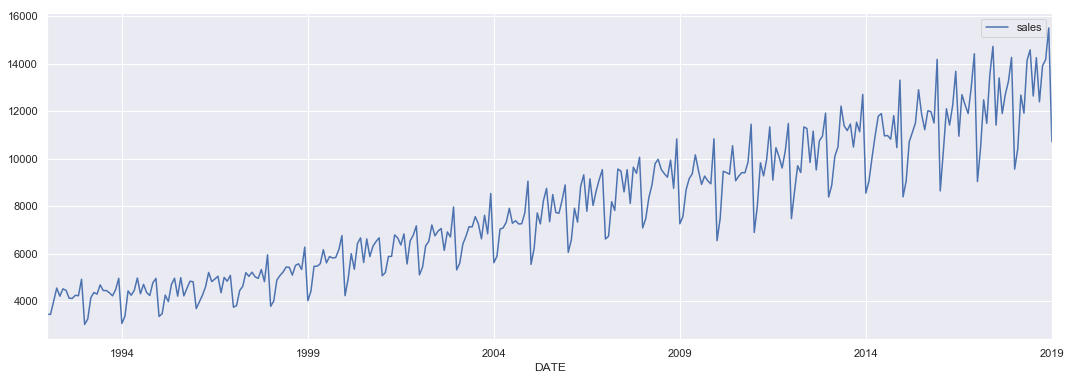

In [267]:
df.plot(figsize = (18,6))

# The nike sales data is monthly average so we will convert the date in time index of M.

In [268]:
df.index.freq = 'MS'

In [269]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq='MS')

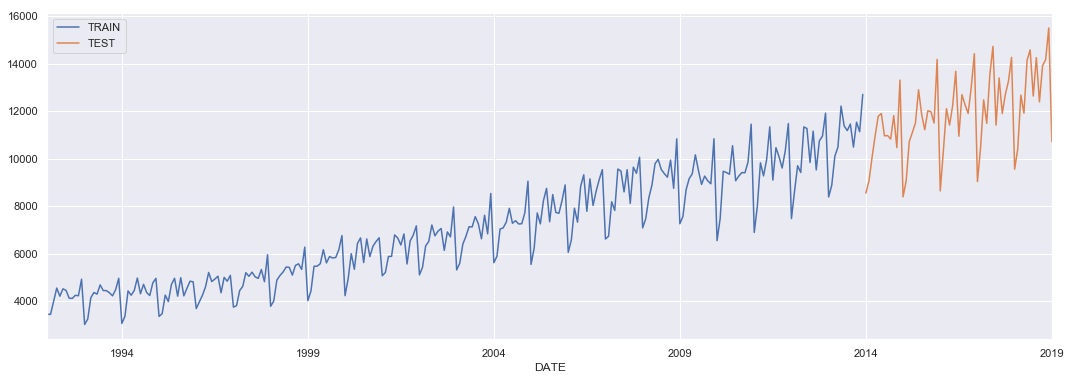

In [270]:
# Before any Investigation, lets create divide the dataset into train and test dataset.
train = df[:264]
test = df[264:]
train['sales'].plot(figsize = (18,6), legend = True, label = 'TRAIN')
test['sales'].plot(figsize = (18,6), legend = True, label = 'TEST')
plt.show();

# ETS Decomposition

In [271]:
# We will see if the data has error, trend and seasonality patterns.
from statsmodels.tsa.seasonal import seasonal_decompose

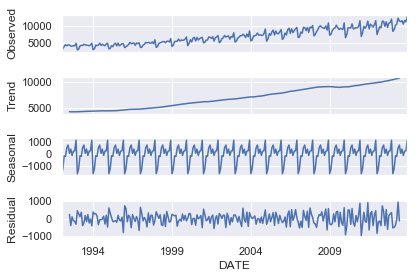

In [272]:
seasonal_decompose(train['sales'], model = 'add').plot();

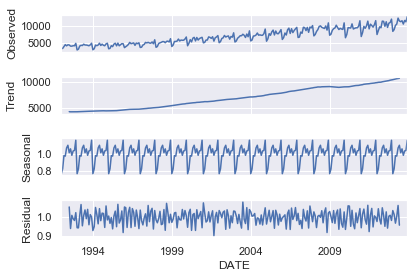

In [273]:
seasonal_decompose(train['sales'], model = 'mul').plot();

In [274]:
# The above graph shows the data has exponentially trend , season data as the error seems to in correct with 'MUL' model and
# the seasonality seems to be constant over time here.

# Check for Seasonality Of Data

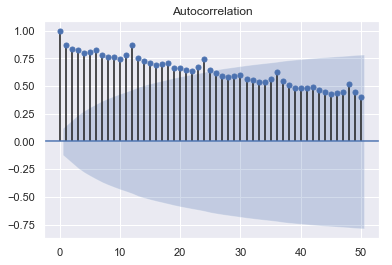

In [275]:
# In order to check the seasonality of the data, we plot ACF(AutoCorrelation Function), and see frequent SPIKES.
from statsmodels.graphics.tsaplots import plot_acf
lags=50
plot_acf(train['sales'],lags=lags);

In [276]:
# We will include seasonal factor for the above series to forecast values.

# 1. Naive Approach

In [277]:
#Take the last day value and estimate the same value for the next day.
train['naive'] = train['sales'].shift(1);
train = train.dropna()

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


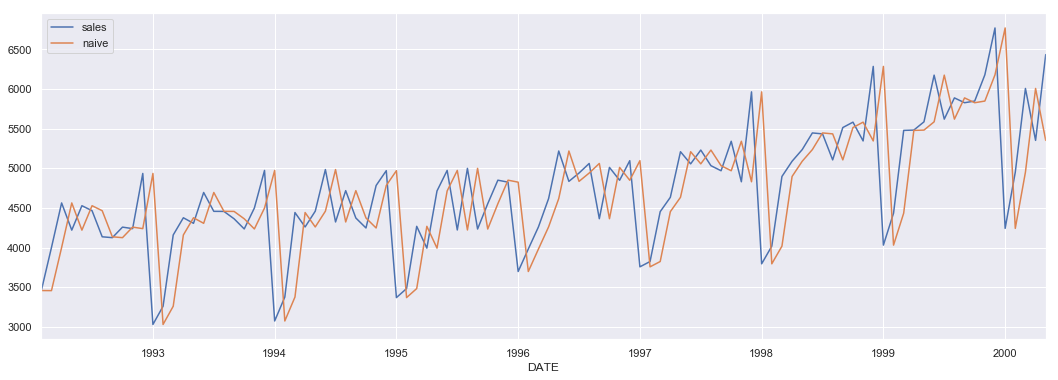

In [278]:
train[:100].plot(figsize = (18,6))

In [282]:
from sklearn.metrics import mean_squared_error

In [283]:
result = pd.DataFrame()
RMSE_Naive = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['naive']))
result = result.append({"Model":"Naive", "RMSE_Value": RMSE_Naive}, ignore_index=True)

In [292]:
result

,Model,RMSE_Value
0,Naive,1090.162973
1,SA,2246.209919


In [285]:
len(train)

263

# 2. Simple Average

In [289]:
# It takes the average of all previous records to predict the next forecast
train = df[:264]
test = df[264:]
train['simple_avg'] = ""
for i in range(0,264):
    avg = np.around(train['sales'][0:i].mean(), decimals = 3)
    train['simple_avg'][i] = avg
    
train['simple_avg'] = train['simple_avg'].shift(-1)
train = train.dropna()

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

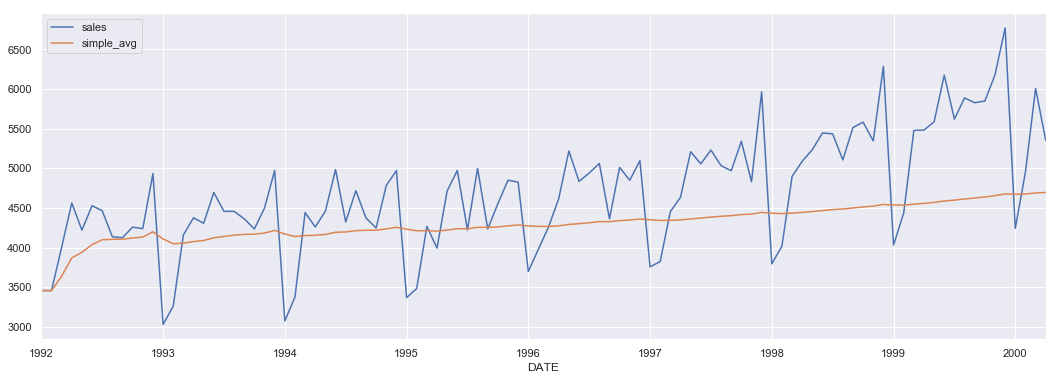

In [290]:
train[:100].plot(figsize = (18,6))

In [291]:
RMSE_SA = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['simple_avg']))
result = result.append({"Model":"SA", "RMSE_Value": RMSE_SA}, ignore_index=True)

# 3. Standard Moving Average

In [293]:
# Forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values
# Here will take p=2,4,6, Later auto_arima will pick up the best value of 'p' for Moving Average Model.

In [294]:
train = df[:264]
test = df[264:]
train['MA-2'] = train['sales'].rolling(2).mean()
train['MA-4'] = train['sales'].rolling(4).mean()
train['MA-6'] = train['sales'].rolling(6).mean()

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

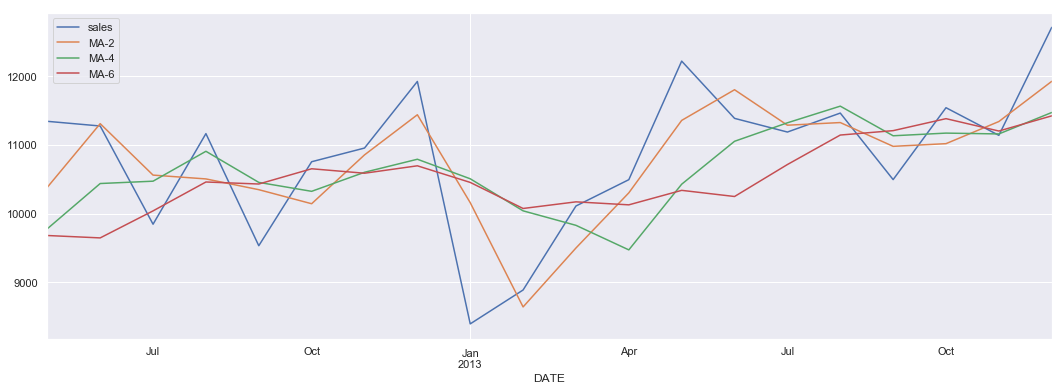

In [295]:
train[-20:].plot(figsize = (18,6))

In [296]:
RMSE_MA_2 = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['MA-2']))
result = result.append({"Model":"MA-2", "RMSE_Value": RMSE_MA_2}, ignore_index=True)

RMSE_MA_4 = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['MA-4']))
result = result.append({"Model":"MA-4", "RMSE_Value": RMSE_MA_4}, ignore_index=True)

RMSE_MA_6 = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['MA-6']))
result = result.append({"Model":"MA-6", "RMSE_Value": RMSE_MA_6}, ignore_index=True)

In [297]:
result

,Model,RMSE_Value
0,Naive,1090.162973
1,SA,2246.209919
2,MA-2,548.633188
3,MA-4,724.877881
4,MA-6,787.500312


# 4. SES [Simple Exponential Smoothing]

In [298]:
# We will start with a fresh train and test data
train = df[:264]
test = df[264:]
# When we consider that there is only Level in dataset and no trend and seasonality.
# We provide weightage to the most recent data
# The level factor is denoted by "𝛼"

In [299]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span =12
alpha = 2 / (span + 1)
print (alpha)

0.15384615384615385


In [300]:
model = SimpleExpSmoothing(train['sales'])

In [301]:
fitted_model = model.fit(smoothing_level=alpha, optimized = False)

In [302]:
fitted_model.fittedvalues.head()

DATE
1992-01-01    3459.000000
1992-02-01    3459.000000
1992-03-01    3458.846154
1992-04-01    3542.408284
1992-05-01    3699.576240
Freq: MS, dtype: float64

In [303]:
# we will use shift(-1) for proper alignment and then add this series as a new column in train dataframe.
train['SES'] = fitted_model.fittedvalues.shift(-1)

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


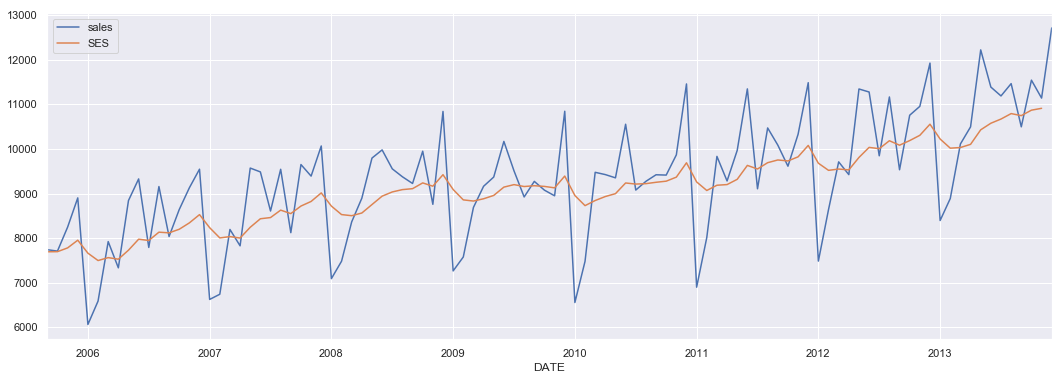

In [304]:
train[-100:].plot(figsize = (18,6))

In [305]:
RMSE_SES = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['SES']))
result = result.append({"Model":"SES", "RMSE_Value": RMSE_SES}, ignore_index=True)

In [306]:
result

,Model,RMSE_Value
0,Naive,1090.162973
1,SA,2246.209919
2,MA-2,548.633188
3,MA-4,724.877881
4,MA-6,787.500312
5,SES,738.649395


# 5. Double Exponential Smoothing

In [307]:
# When we consider that there is Level and Trend in dataset and no seasonality.
# The level factor is denoted by "𝛼" and "𝛽"
# The model will Identify optimized values of Alpha and Beta, but we need to specifically provide the type of trend (add/mul)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = df[:264]
test = df[264:]

In [308]:
model_add = ExponentialSmoothing(train['sales'], trend='add') # We can use 'mul' also and check accuracy
fitted_model_add = model_add.fit()
fitted_model_add.params

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.05263157894736842,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 3459.0,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [309]:
train['DES'] = fitted_model_add.fittedvalues.shift(-1)
RMSE_DES = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['DES']))
result = result.append({"Model":"DES", "RMSE_Value": RMSE_DES}, ignore_index=True)
result

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Model,RMSE_Value
0,Naive,1090.162973
1,SA,2246.209919
2,MA-2,548.633188
3,MA-4,724.877881
4,MA-6,787.500312
5,SES,738.649395
6,DES,795.232530


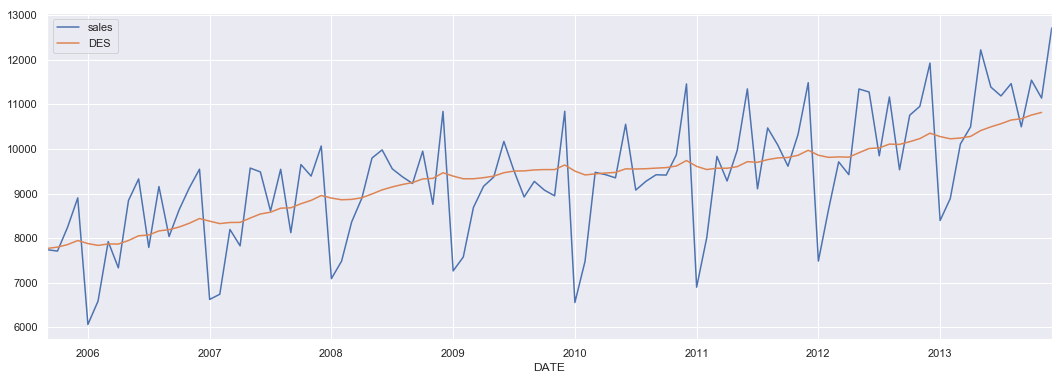

In [310]:
train[-100:].plot(figsize = (18,6))

# 5. Triple Exponential Smoothing (Holt's Winter Model)

In [311]:
#The level factor is denoted by "𝛼" , "𝛽" and "ɣ"
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = df[:264]
test = df[264:]

model = ExponentialSmoothing(train['sales'], trend='add', seasonal='add', seasonal_periods=12) 
fitted_model = model.fit()
fitted_model.params

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.105263155534782,
 'smoothing_slope': 0.052580563415418065,
 'smoothing_seasonal': 0.8947368397453083,
 'damping_slope': nan,
 'initial_level': 5253.30295498474,
 'initial_slope': 6.721451763124449,
 'initial_seasons': array([-1794.0689683 , -1794.9656964 , -1250.91153281,  -688.94186442,
        -1031.88770083,  -723.89817246,  -786.93355934, -1115.92525425,
        -1126.99747237,  -994.05055268, -1013.04260869,  -317.10616063]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [312]:
train['HWM'] = fitted_model.fittedvalues.shift(-1)
RMSE_HWM = np.sqrt(mean_squared_error(train.dropna()['sales'], train.dropna()['HWM']))
result = result.append({"Model":"HWM", "RMSE_Value": RMSE_HWM}, ignore_index=True)
result

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Model,RMSE_Value
0,Naive,1090.162973
1,SA,2246.209919
2,MA-2,548.633188
3,MA-4,724.877881
4,MA-6,787.500312
5,SES,738.649395
6,DES,795.232530
7,HWM,1020.301963


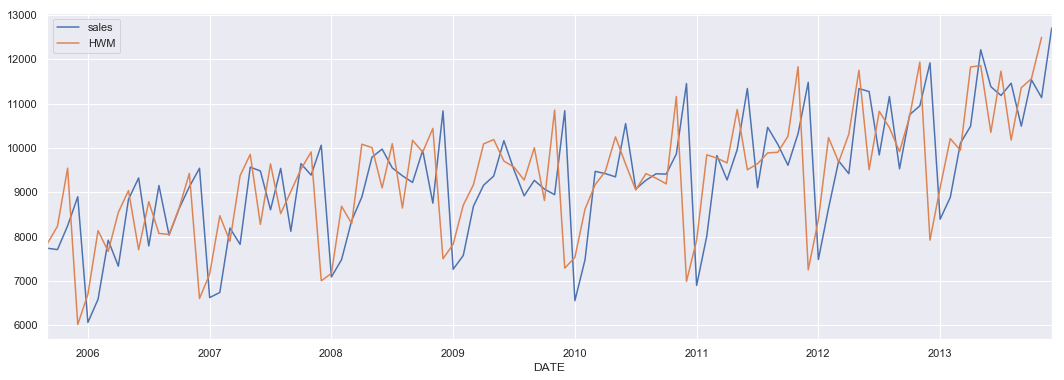

In [313]:
train[-100:].plot(figsize = (18,6))

In [314]:
# The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series 
# to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would 
# be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

In [110]:
babar = pd.DataFrame()
babar_runs = [54,25,12,62,4,22,51,62,83,29,40,30,9,12,31,120,123,117,33,34,84,31,100,13,125,16,8,31,10,38,46,103,101,30,69,0,10,8,3,10,30,29,19,106,33,47,66,9,1,0,46,92,49,12,69,41,24,16,51,15,115,80,22,63,30,48,69,101,45,96,115,31]
babar["babar_runs"] = babar_runs

kohli = pd.DataFrame()
kohli_runs = [12,37,25,54,31,2,16,79,30,10,27,54,107,9,91,71,102,2,31,57,0,82,18,68,11,18,10,28,0,8,37,118,105,64,63,0,2,54,22,28,87,2,100,8,34,12,1,59,24,9,35,2,81,0,22,94,55,9,7,16,107,37,112,35,86,0,3,117,20,23,80,31,77,18,15,12,66,21,133,108,66,183,106,1,38,128,23,0,6,7,15,37,77,26,0,31,22,22,58,43,11,2,102,31,2,115,14,68,61,100,68,115,0,86,99,19,31,0,123,78,6,2,82,136,48,5,0,40,1,13,2,62,127,22,49,53,66,139,9,4,3,8,107,46,33,33,44,38,3,1,1,23,25,11,12,77,138,7,91,59,117,106,8,85,9,154,45,65,122,8,55,81,0,76,96,5,32,87,11,3,111,82,4,3,131,110,0,92,28,21,39,121,29,113,112,46,160,75,36,129,75,45,71,140,157,107,16,33,3,104,46,45,43,60,44,116,123,7,20,18,82,77,67,72,66,26,34,1,120,114]
kohli["kohli_runs"] = kohli_runs

sachin = pd.DataFrame()
sachin_runs = [0,0,36,10,20,19,31,36,53,30,4,53,52,22,11,49,0,62,4,1,1,36,57,48,21,77,31,57,4,69,35,11,54,81,4,84,14,39,15,10,22,21,32,23,21,82,1,3,24,5,34,3,8,21,15,25,26,2,24,3,15,28,1,11,52,15,82,63,40,63,73,6,24,11,6,110,0,0,0,8,115,34,62,66,54,88,105,13,37,47,48,4,112,41,30,39,7,65,1,127]
sachin["sachin_runs"] = sachin_runs

babar['sum'] = ''
for i in range(0,len(babar)):
    sum = babar["babar_runs"][0:i].sum()
    babar['sum'][i] = sum

kohli['sum'] = ''
for i in range(0,len(kohli)):
    sum = kohli["kohli_runs"][0:i].sum()
    kohli['sum'][i] = sum

sachin['sum'] = ''
for i in range(0,len(sachin)):
    sum = sachin["sachin_runs"][0:i].sum()
    sachin['sum'][i] = sum

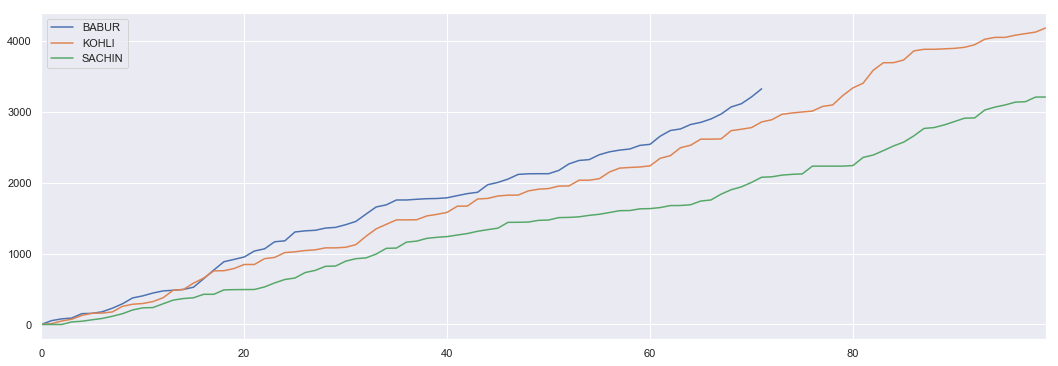

In [112]:
babar["sum"].plot(figsize=(18,6), legend = True, label = 'BABUR')
kohli["sum"][:100].plot(figsize=(18,6), legend = True, label = 'KOHLI')
sachin["sum"][:100].plot(figsize=(18,6), legend = True, label = 'SACHIN')
plt.show()

# 6. ARIMA - Auto-Regressive Integrated Moving Averages.
# Descriptive Statistics and Tests

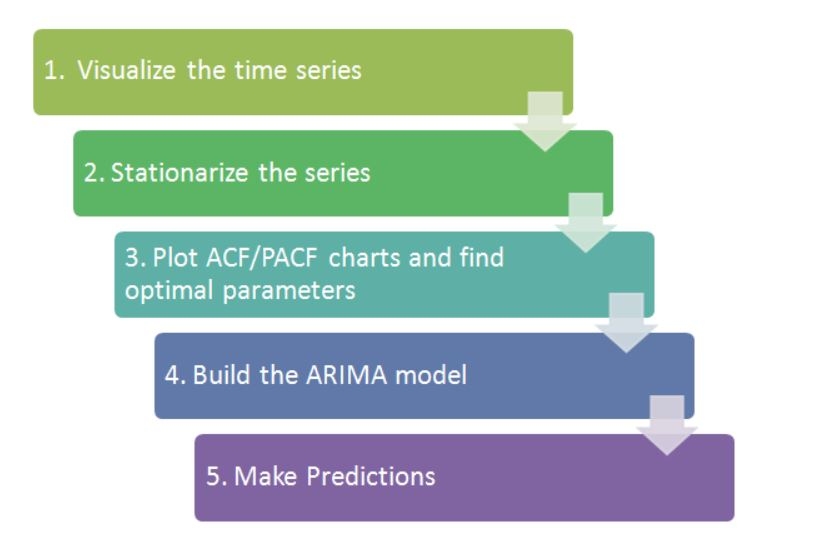

In [315]:
Image('TS.JPG')

In [316]:
# We need to check the Stationarity, independent and Casuality to proceed further.
#The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. 

In [317]:
# CHeck For Stationarity:
#𝐻0: Series is nonstationary 
#𝐻1: Series supports stationarity. (p < 0.05)

In [318]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [319]:
train = df[:264]
test = df[264:]

if adfuller(train["sales"], autolag='AIC')[1] < 0.05:
    print("The series is Stationary")
else:
    print("The series is Non-Stationary")

The series is Non-Stationary


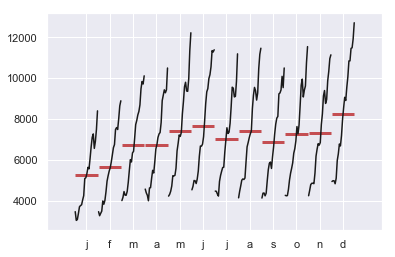

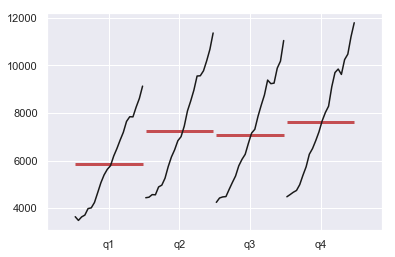

In [320]:
# We would need to perform certain tasks(differencing) to remove non-stationarity from the series.
#1. After that we can apply adfuller and check the p-value.
#2. We can also tsaplot the time-series for checking the seasonal(Monthly/Quarterly) average
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(train['sales']);
quarter_plot(train['sales'].resample('Q').mean());

In [321]:
# Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
# Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
# Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [322]:
from pmdarima import auto_arima

In [323]:
auto_arima(train['sales'],error_action='ignore'
           , m=12, seasonal=True
          ).summary()

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\py948\Documents\ForDataScience\Anaconda\

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  264
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1748.212
Date:                            Fri, 06 Dec 2019   AIC                           3516.424
Time:                                    18:46:28   BIC                           3551.678
Sample:                                         0   HQIC                          3530.611
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.4370      7.724     -0.316      0.752     -17.576      12.702
ar.L1         -0.8087      0.123     -6.566      0.000      -1.050      -0.567
ar.L2         -0.3292      0.077     -4.275      0.000      -0.480      -0.178
ma.L1         -0.0066      0.131     -0.051      0.960      -0.264       0.250
ma.L2         -0.4220      0.115     -3.660      0.000      -0.648      -0.196
ar.S.L12       0.8959      0.045     19.879      0.000       0.808       0.984
ar.S.L24      -0.9638      0.030    -31.795      0.000      -1.023      -0.904
ma.S.L12      -1.1034      0.159     -6.924      0.000      -1.416      -0.791
ma.S.L24       0.9510      0.233      4.078      0.000       0.494       1.408
sigma2      5.734e+04   1.11e+04      5.163      0.000    3.56e+04    7.91e+04
===================================================================================
Ljung-Box (Q):                       58.01   Jarque-Bera (JB):                 2.01
Prob(Q):                              0.03   Prob(JB):                         0.37
Heteroskedasticity (H):               3.88   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [324]:
# recommended order is the one with the lowest Akaike information criterion or AIC score.
# The above summary suggests, the data envolves Exogenous-Variables[SARIMA-X], i.e. holidays affects sales.
# SARIMAX(5, 1, 4)	 When Seasonal factor not included with Exogenous-Variable
# SARIMAX(2, 1, 2)x(2, 1, 2, 12)	 When Seasonal factor IS included with Exogenous-Variable.
# Hence, a difference of 1 order would make series stationary
# Lets cross-check

In [325]:
train_diff_1 = train - train.shift(1)
train_diff_1 = train_diff_1.dropna()

if adfuller(train_diff_1["sales"], autolag='AIC')[1] < 0.05:
    print("The series is Stationary")
else:
    print("The series is Non-Stationary")

The series is Stationary


# This Works ! d should be 1

In [326]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [327]:
model = SARIMAX(train['sales'], order = (2,1,2), seasonal_order = (2,1,2,12))
result_model = model.fit()
result_model.summary()

C:\Users\py948\Documents\ForDataScience\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  264
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1747.399
Date:                            Fri, 06 Dec 2019   AIC                           3512.797
Time:                                    18:47:31   BIC                           3544.526
Sample:                                01-01-1992   HQIC                          3525.566
                                     - 12-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8861      0.107     -8.277      0.000      -1.096      -0.676
ar.L2         -0.3381      0.074     -4.591      0.000      -0.482      -0.194
ma.L1          0.0565      0.108      0.522      0.602      -0.156       0.269
ma.L2         -0.4659      0.100     -4.656      0.000      -0.662      -0.270
ar.S.L12       0.8975      0.044     20.536      0.000       0.812       0.983
ar.S.L24      -0.9606      0.030    -31.915      0.000      -1.020      -0.902
ma.S.L12      -1.1111      0.135     -8.223      0.000      -1.376      -0.846
ma.S.L24       0.9389      0.182      5.162      0.000       0.582       1.295
sigma2      5.507e+04   8235.807      6.687      0.000    3.89e+04    7.12e+04
===================================================================================
Ljung-Box (Q):                       54.03   Jarque-Bera (JB):                 2.37
Prob(Q):                              0.07   Prob(JB):                         0.31
Heteroskedasticity (H):               3.99   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [328]:
# Auto Arima suggested SARIMAX, which means the holidays are also Important factor in demand forecast.
# The df needs feature enineering which will add col for holiday, (0 or 1). Ex: train['holiday']
# our model would be like below:
# SARIMAX(train['sales'],exog=train['holiday'],order=(2,1,2),seasonal_order=(2,1,2,12))

In [329]:
# As of now will continue with suggested SARIMAX:
start = len(train)
end = len(train)+len(test)-1
predict = result_model.predict(start,end,dynamic=False).rename('Predictions')

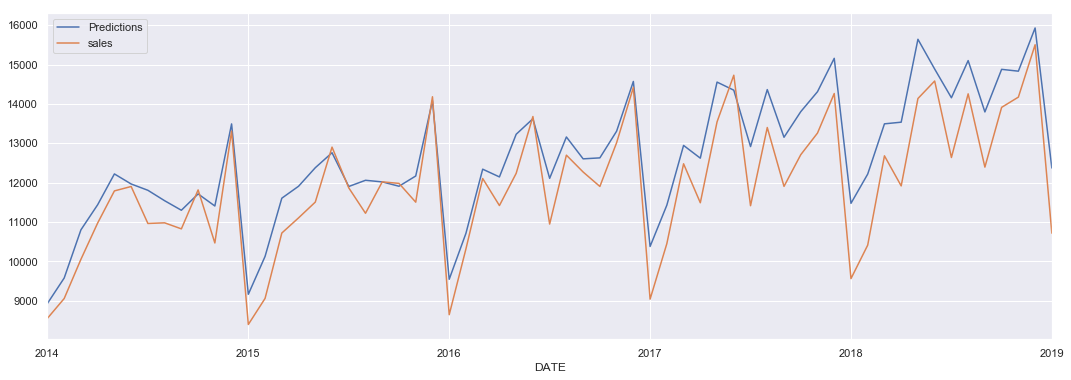

In [330]:
predict.plot(legend = True)
test['sales'].plot(figsize = (18,6), legend = True)

In [335]:
RMSE_SARIMA = np.sqrt(mean_squared_error(test['sales'], predict))
result = result.append({"Model":"SARIMA", "RMSE_Value": RMSE_SARIMA}, ignore_index=True)
result

,Model,RMSE_Value
0,Naive,1090.162973
1,SA,2246.209919
2,MA-2,548.633188
3,MA-4,724.877881
4,MA-6,787.500312
5,SES,738.649395
6,DES,795.232530
7,HWM,1020.301963
8,SARIMA,892.189119


In [341]:
# Now we will forecast teh future values by fitting in whole data and predicting next 50 values
predict = result_model.predict(len(df),len(df)+100,dynamic=False).rename('FORECAST SALES')

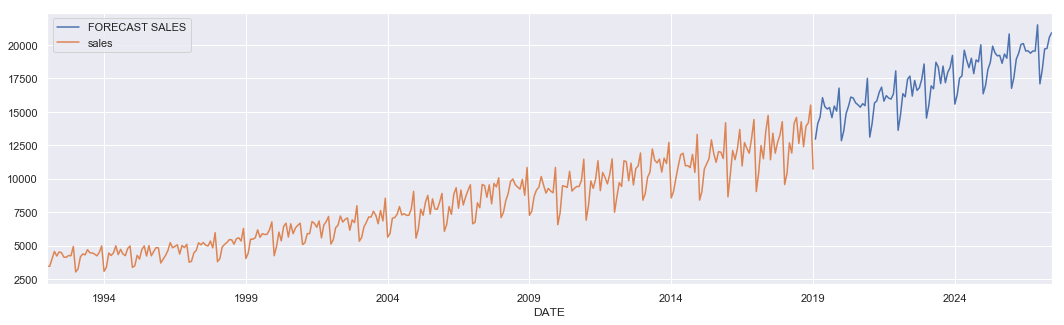

In [342]:
predict.plot(figsize =(18,5), legend = True)
df['sales'].plot(legend = True)